# Crowdsourcing Short squeeze Dashboard
A dashboard will be built utilizing crucial data scientist skills like Python fundamentals, Python data structures, working with data in Python, etc.
___
From the [Python Project for Data Science IBM Coursera course](https://www.coursera.org/learn/python-project-for-data-science/home/)

## Web Scraping with Python
Python provides several libraries for web scraping. Some include:
1. **BeautifulSoup:** a Python library used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner.
```python
from bs4 import BeautifulSoup
import requests
URL = "http://www.example.com"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
```
2. **Scrapy:** an open-source and collaborative web crawling framework for Python. It is used to extract the data from the website.
```python
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}
```
3. **Selenium:** a tool used for controlling web browsers through programs and automating browser tasks.
```python
from selenium import webdriver
driver = webdriver.Firefox()
driver.get("http://www.example.com")
```

## Extracting Stock Data Using a Python Library
A company's stock share is a piece of the company more precisely:

**A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]**

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the yfinance library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.

In [185]:
# Install needed modules 
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [186]:
import yfinance as yf
import pandas as pd

### Using the yfinance Library to Extract Stock Data
Using the `Ticker` module, we can create an object that will allow us to access functions to extract data. To do this, we will need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [187]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance

In [188]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

# the above does not work on windows computers because wget doesn't work with jupyter notebooks for some reason

In [189]:
import requests 

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
filename = 'apple.json'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print('File downloaded successfully!')
else:
    print('Failed to download the file. Status code:', response.status_code)

File downloaded successfully!


#### Stock Info
Using the attribute `info` we can extract information about the stock as a Python dictionary.

In [190]:
import json

with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the `country` using the key country.

In [191]:
apple_info['country']

'United States'

### Extracting Share Price
A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the `history()` method, we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how fare back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo), 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [192]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [193]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` parameter to `True` so the change takes place to the DataFrame itself.

In [194]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

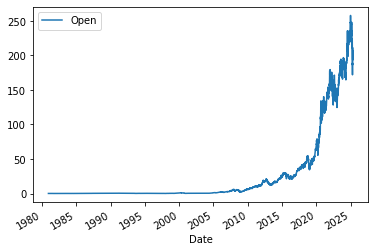

In [195]:
apple_share_price_data.plot(x='Date', y='Open')

### Extracting Dividends
Dividends are the distribution of a companys profits to to shareholders. In this case, they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the `history` function.

In [196]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
Name: Dividends, Length: 86, dtype: float64

We can plot the dividends overtime:

<Axes: xlabel='Date'>

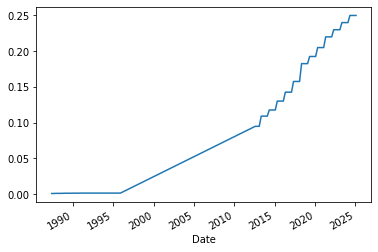

In [197]:
apple.dividends.plot()

### Exercise
Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object `amd`.

In [198]:
amd = yf.Ticker("AMD")

In [199]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

In [200]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json'
filename = 'amd.json'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print('File downloaded successfully!')
else:
    print('Failed to download the file. Status code:', response.status_code)

File downloaded successfully!


In [201]:
import json

with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(amd_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

**Question 1** Use the key `country` to find the country the stock belongs to.

In [202]:
amd_info['country']

'United States'

**Question 2** Use the key `sector` to find the stock belongs to.

In [203]:
amd_info['sector']

'Technology'

**Question 3** Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).

In [204]:
amd_share_price_data = amd.history(period="max")

amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<Axes: xlabel='Date'>

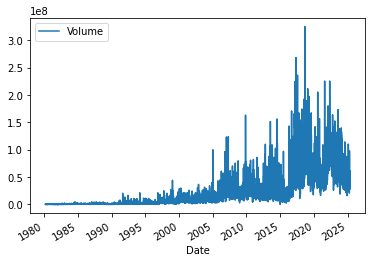

In [205]:
amd_share_price_data.reset_index(inplace=True)

amd_share_price_data.plot(x='Date', y='Volume')

## Extracting and Visualizing Stock Data
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

In [206]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [207]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'iframe'

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

In [208]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Define Graphing Function
In this section, we define the function `make_graph`. 
**It takes a dataframe with stick data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**

In [209]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2025-01-01']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2025-04-20']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

### Question 1: Use yfinance to Extract Stock Data

Use the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [210]:
tesla = yf.Ticker("TSLA")

Use the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `"max"` so we get information for the maximum amount of time.

In [211]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [212]:
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [213]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
filename = 'html_data'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print('File downloaded successfully!')
else:
    print('Failed to download the file. Status code:', response.status_code)

File downloaded successfully!


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html_parser`.

In [214]:
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
!pip install pandas
!pip install --upgrade beautifulsoup4
!pip install html5lib
!pip3 install html5lib

zsh:1: command not found: mamba
zsh:1: command not found: mamba
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3


In [215]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import html5lib

In [216]:
import warnings
warnings.simplefilter("ignore")

In [217]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [218]:
tables = soup.find_all('table')
len(tables)

6

In [219]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [220]:
print(tables[table_index].prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

In [221]:
!pip install "pandas[html]"
!pip install html5lib
!pip install "beautifulsoup4<4.13.0"
!pip install "pandas[html]" --user  # --user avoids permission issues


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.13.4
    Uninstalling beautifulsoup4-4.13.4:
      Successfully uninstalled beautifulsoup4-4.13.4


In [222]:
# Check installed packages
!pip list | grep -E "html5lib|lxml|beautifulsoup4"

beautifulsoup4            4.12.3
html5lib                  1.1
lxml                      4.6.4


In [223]:
# Confirm you're in the right environment
import sys
print(sys.executable)  # Should match your environment path

/opt/homebrew/Caskroom/miniforge/base/bin/python


In [224]:
import html5lib
dataframe_list = pd.read_html(html_data, flavor='lxml')

In [225]:
tesla_revenue = pd.read_html(html_data, match="Tesla Quarterly Revenue", flavor='lxml')[0]

In [226]:
print(tesla_revenue.head())

  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2022-09-30   
1                                 2022-06-30   
2                                 2022-03-31   
3                                 2021-12-31   
4                                 2021-09-30   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $21,454  
1                                      $16,934  
2                                      $18,756  
3                                      $17,719  
4                                      $13,757  


Execute the following line to remove the comma and dollar sign from the `Revenue` column.

In [227]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

KeyError: 'Revenue'

In [ ]:
tesla_revenue.tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.head())

AttributeError: 'DataFrame' object has no attribute 'tesla_revenue'